In [1]:
#import libraries
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# load data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
df['date'].sample(n=10).sort_index()

4676     19911021
4738     19911222
5257     19930524
5472     19931225
6115     19950929
6601     19970127
7308     19990104
8567     20020616
14136    20170914
14359    20180425
Name: date, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
#convert data coulumn to datetime 
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [7]:
#set index
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [8]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

no frequency in the index

In [9]:
#filter required data
df = df.loc['2000':, ['precipitation','mean_temp','min_temp', 'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [10]:
#missing data
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [11]:
#Impute any missing values
df['mean_temp']= df['mean_temp'].interpolate()
df['min_temp']= df['min_temp'].interpolate()
df['max_temp']= df['max_temp'].interpolate()
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [12]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

In [14]:
#Plot the mean, min, and max temps for 2018-2020 on one figure
temp_cols = ['mean_temp', 'min_temp', 'max_temp']
plot_df = df.loc['2018': '2020', temp_cols]
plot_df

,mean_temp,min_temp,max_temp
date,,,
2018-01-01,6.7,5.4,12.30
2018-01-02,7.9,3.5,10.80
2018-01-03,8.2,5.7,12.90
2018-01-04,7.7,5.5,9.35
2018-01-05,7.2,5.3,5.80
...,...,...,...
2020-12-27,7.5,7.6,7.50
2020-12-28,1.1,-1.3,3.60
2020-12-29,2.6,1.1,4.10


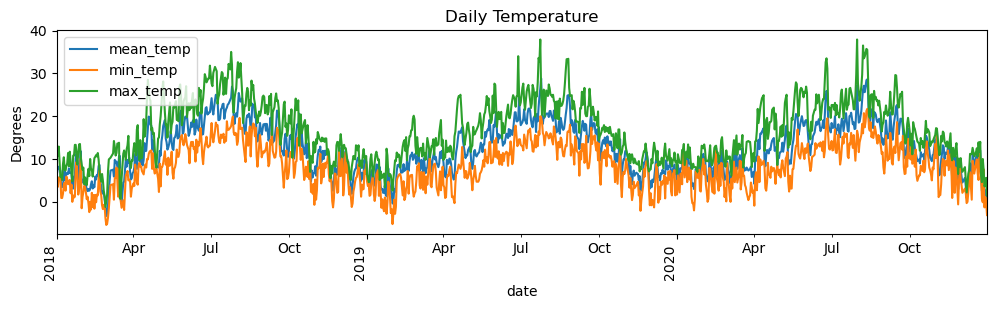

In [31]:
#plot the data
ax = plot_df.plot(figsize=(12,3))
ax.set(title = "Daily Temperature", ylabel= 'Degrees')

## customize major ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

#Customize  minor xaxis ticks 
loc_3months = mdates.MonthLocator(interval=3)
fmt_month = mdates.DateFormatter('%b')

ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_month)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 90)

In [33]:
#Plot the precipitation and snow depth for 2000-2020
prec_cols = ['precipitation', 'snow_depth']

plot_df = df.loc['2000':, prec_cols]
plot_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2020-12-27,2.0,0.0
2020-12-28,0.2,0.0
2020-12-29,0.0,0.0


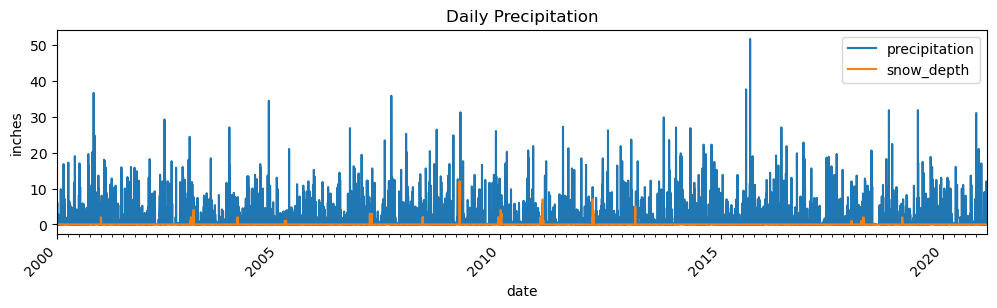

In [42]:
#plot data
ax= plot_df.plot(figsize = (12,3))
ax.set(title =  "Daily Precipitation", ylabel = 'inches')

#customize major xticks
loc_year = mdates.YearLocator(5)
fmt_year = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

#Customize the minor xaxis ticks
loc_month = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(loc_month)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which = 'major', rotation = 45)